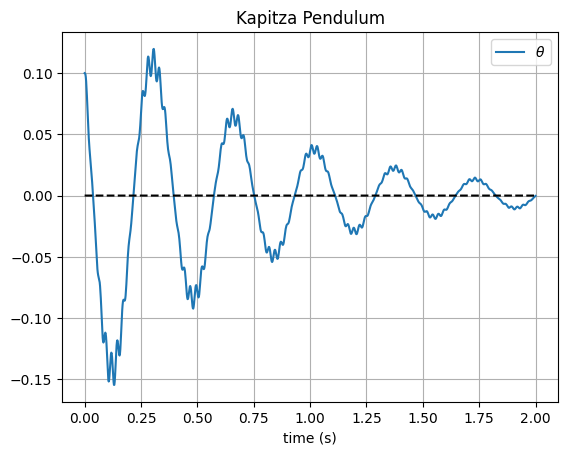

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Simulate the Kapitza Pendulum ####

# assign constants
m = 1
g = 9.81
ell = 1
a = 0.1
w = 2*np.pi*40 # 40 Hz
b = 3

# initial conditions
x0 = np.array([0.1, 0])

# our system of differential equations
# see "derivation.ipynb" for details
def kapitza_ODE(t, y):
    theta = y[0]
    theta_dot = y[1]

    return (
        theta_dot,
        (-a*w**2*np.sin(t*w) + g)*np.sin(theta)/ell
    )

def kapitza_damped_ODE(t,y):
    theta = y[0]
    theta_dot = y[1]

    return (
        theta_dot,
        (-b*theta_dot + ell*m*(-a*w**2*np.sin(t*w) + g)*np.sin(theta))/(ell**2*m)
    )

# solve the ODE
tfinal = 2
slowdown_factor = 20
frame_rate = 30*slowdown_factor # 30 fps is real time

# without damping
# sol = solve_ivp(kapitza_ODE, [0, tfinal], x0, t_eval=np.linspace(0,tfinal,tfinal*frame_rate+1))

# with damping
sol = solve_ivp(kapitza_damped_ODE, [0, tfinal], x0, t_eval=np.linspace(0,tfinal,tfinal*frame_rate+1))


# output of the solver
theta = sol.y[0]
t = sol.t

# plot theta and ell over time
plt.plot(t, theta, label="$\\theta$")
plt.legend()
plt.grid()
plt.xlabel("time (s)")
plt.title('Kapitza Pendulum')
plt.plot(t, np.zeros_like(t), 'k--')
plt.show()

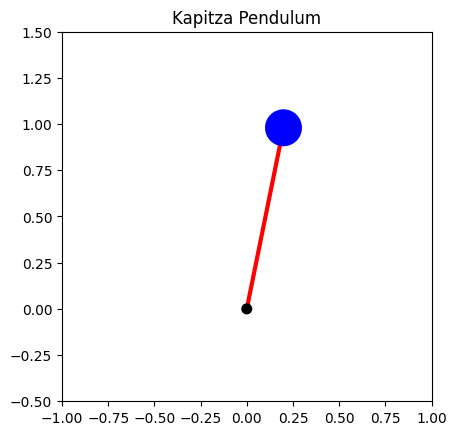

In [29]:
# create an image of the pendulum at a particular state
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-0.5,1.5)

# state to visualize
theta = 0.2
t = 0
a = 0.1

# mass position
px = ell * np.sin(theta) 
py = ell * np.cos(theta) + a*np.sin(w*t)
circle = ax.add_patch(plt.Circle( (px,py), 0.1, fc='b', zorder=3))
pivot = ax.add_patch(plt.Circle( (0,a*np.sin(w*t)), 0.03, fc='k', zorder=3))

# stick
stick = Line2D([0,px], [a*np.sin(w*t), py], color='r', linewidth=3)
ax.add_line(stick)
# ax.grid()
ax.set_title('Kapitza Pendulum')
plt.savefig('kapitza_pendulum.png')

In [1]:
# Animate the pendulum
import matplotlib.animation as animation

# output of the solver
theta = sol.y[0]
t = sol.t

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-0.5, 1.5)
ax.set_title('Kapitza Pendulum')
# ax.grid()

# assign constants
m = 1
g = 9.81
ell = 1
a = 0.1
w = 2*np.pi*40 # 40 Hz
b = 3

# doesn't matter where we put these
circle = ax.add_patch(plt.Circle( (0,0), 0.1, fc='b', zorder=3))
stick = ax.add_line(Line2D([0,1],[0,1], color='r', linewidth=3))
pivot = ax.add_patch(plt.Circle( (0,0), 0.03, fc='k', zorder=3))
timestamp = ax.add_artist(plt.text(-0.25,1.4,'time = 0.00 s'))
ax.add_artist(plt.text(-0.45,1.3,'Playback speed: 0.05x'))

# animate each frame "i"
def animate(i):

    # mass position
    px = ell * np.sin(theta[i]) 
    py = ell * np.cos(theta[i]) + a*np.sin(w*t[i])
    circle.set_center((px, py))
    pivot.set_center((0, a*np.sin(w*t[i])))
    
    # stick
    stick.set_data([0,px], [a*np.sin(w*t[i]), py])
    
    # timestamp
    timestamp.set(text=f'time = {t[i]:.3f} s')

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('kapitza_pendulum.gif', writer=ffmpeg_writer)


NameError: name 'sol' is not defined